In [1]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../analysis")
import scripts.database as database
import plotly_aggs
import ipas
import numpy as np
import glob
import scipy.optimize as opt
import chart_studio
import chart_studio.plotly as py

# USERNAME = ''  # enter you're username
# API_KEY = ''  # enter you're api_key
#chart_studio.tools.set_credentials_file(username=USERNAME, api_key=API_KEY)
chart_studio.tools.set_credentials_file(username='V_przybylo', api_key='dLMeh8k4zPW1tltWDpvp')

ModuleNotFoundError: No module named 'scripts'

## Read Database

In [ ]:
orientation = 'rand'  # chose which orientation (rand or flat)
if orientation == 'rand':
    rand_orient = True      #randomly orient the seed crystal and new crystal: uses first random orientation
    files = glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_rand*")
else:
    rand_orient = False      #randomly orient the seed crystal and new crystal: uses first random orientation
    files =  glob.glob("/network/rit/lab/sulialab/share/IPAS_3radii/instance_files/createdb_iceagg_flat*")

In [ ]:
%%time
db = database.Database(files)
db.read_database()
db.append_shape()
db.truncate_agg_r(5000)
db.append_agg_phi()
df = db.df  # get the dataframe (db is an instance of database.py module)

## Generate Plot in Plotly (click on output URL)

In [ ]:
index = 1000  # which agg to plot
agg = df.iloc[index]

all_agg_data = []
for crystal_num in range(agg.ncrystals):  # index of monomer in agg
    agg_plt = plotly_aggs.PlotAgg(agg, crystal_num)
    agg_plt.prism_points()
    agg_plt.min_max_all_points()
    agg_plt.basal_points_bottom()
    agg_plt.basal_points_top()
    agg_plt.get_scatter_plot_data()
    # go.Scatter3d for each part of monomer for each monomer in agg
    all_agg_data.extend([agg_plt.trace_prism,
                        agg_plt.trace_basal_top,
                        agg_plt.trace_basal_bottom])

#apply to whole agg, not each individual monomer
agg_plt.ellipsoid_points()
#agg_plt.scatter_ellipsoid()
#all_agg_data.append(agg_plt.ellipsoid_surface)
#all_agg_data.append(agg_plt.ellipsoid_radii)
agg_plt.camera()
agg_plt.layout()

#all_agg_data = np.array(all_agg_data).flatten()
py.iplot(all_agg_data, filename='test',
        auto_open=True, layout=agg_plt.layout)


In [8]:
agg = ipas.cluster_calculations.Cluster_Calculations(agg)
params = agg.fit_ellipse([['x', 'y']])
params

{'xy': [201.51340080724339, 155.03227087315076],
 'width': 8593.456502035886,
 'height': 6530.781915305592,
 'angle': -149.04966499136324}

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

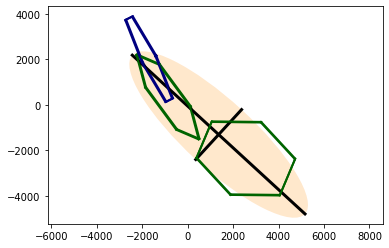

In [10]:
agg.plot_ellipse([['x', 'z']])

[[ 1.26960006e-13  7.09149436e+02  1.33276498e+03  1.79562941e+03
   2.04191442e+03  2.04191442e+03  1.79562941e+03  1.33276498e+03
   7.09149436e+02  1.26960006e-13]
 [ 1.20080962e-13  6.70725764e+02  1.26055210e+03  1.69833725e+03
   1.93127787e+03  1.93127787e+03  1.69833725e+03  1.26055210e+03
   6.70725764e+02  1.20080962e-13]
 [ 1.00189284e-13  5.59618547e+02  1.05173884e+03  1.41700390e+03
   1.61135739e+03  1.61135739e+03  1.41700390e+03  1.05173884e+03
   5.59618547e+02  1.00189284e-13]
 [ 6.94405413e-14  3.87867978e+02  7.28953354e+02  9.82116197e+02
   1.11682133e+03  1.11682133e+03  9.82116197e+02  7.28953354e+02
   3.87867978e+02  6.94405413e-14]
 [ 3.11668389e-14  1.74085895e+02  3.27174462e+02  4.40800960e+02
   5.01260356e+02  5.01260356e+02  4.40800960e+02  3.27174462e+02
   1.74085895e+02  3.11668389e-14]
 [-1.04842742e-14 -5.85610963e+01 -1.10058860e+02 -1.48281901e+02
  -1.68619956e+02 -1.68619956e+02 -1.48281901e+02 -1.10058860e+02
  -5.85610963e+01 -1.04842742e-14

AttributeError: 'Cluster_Calculations' object has no attribute 'plot_axes_ellipsoid'

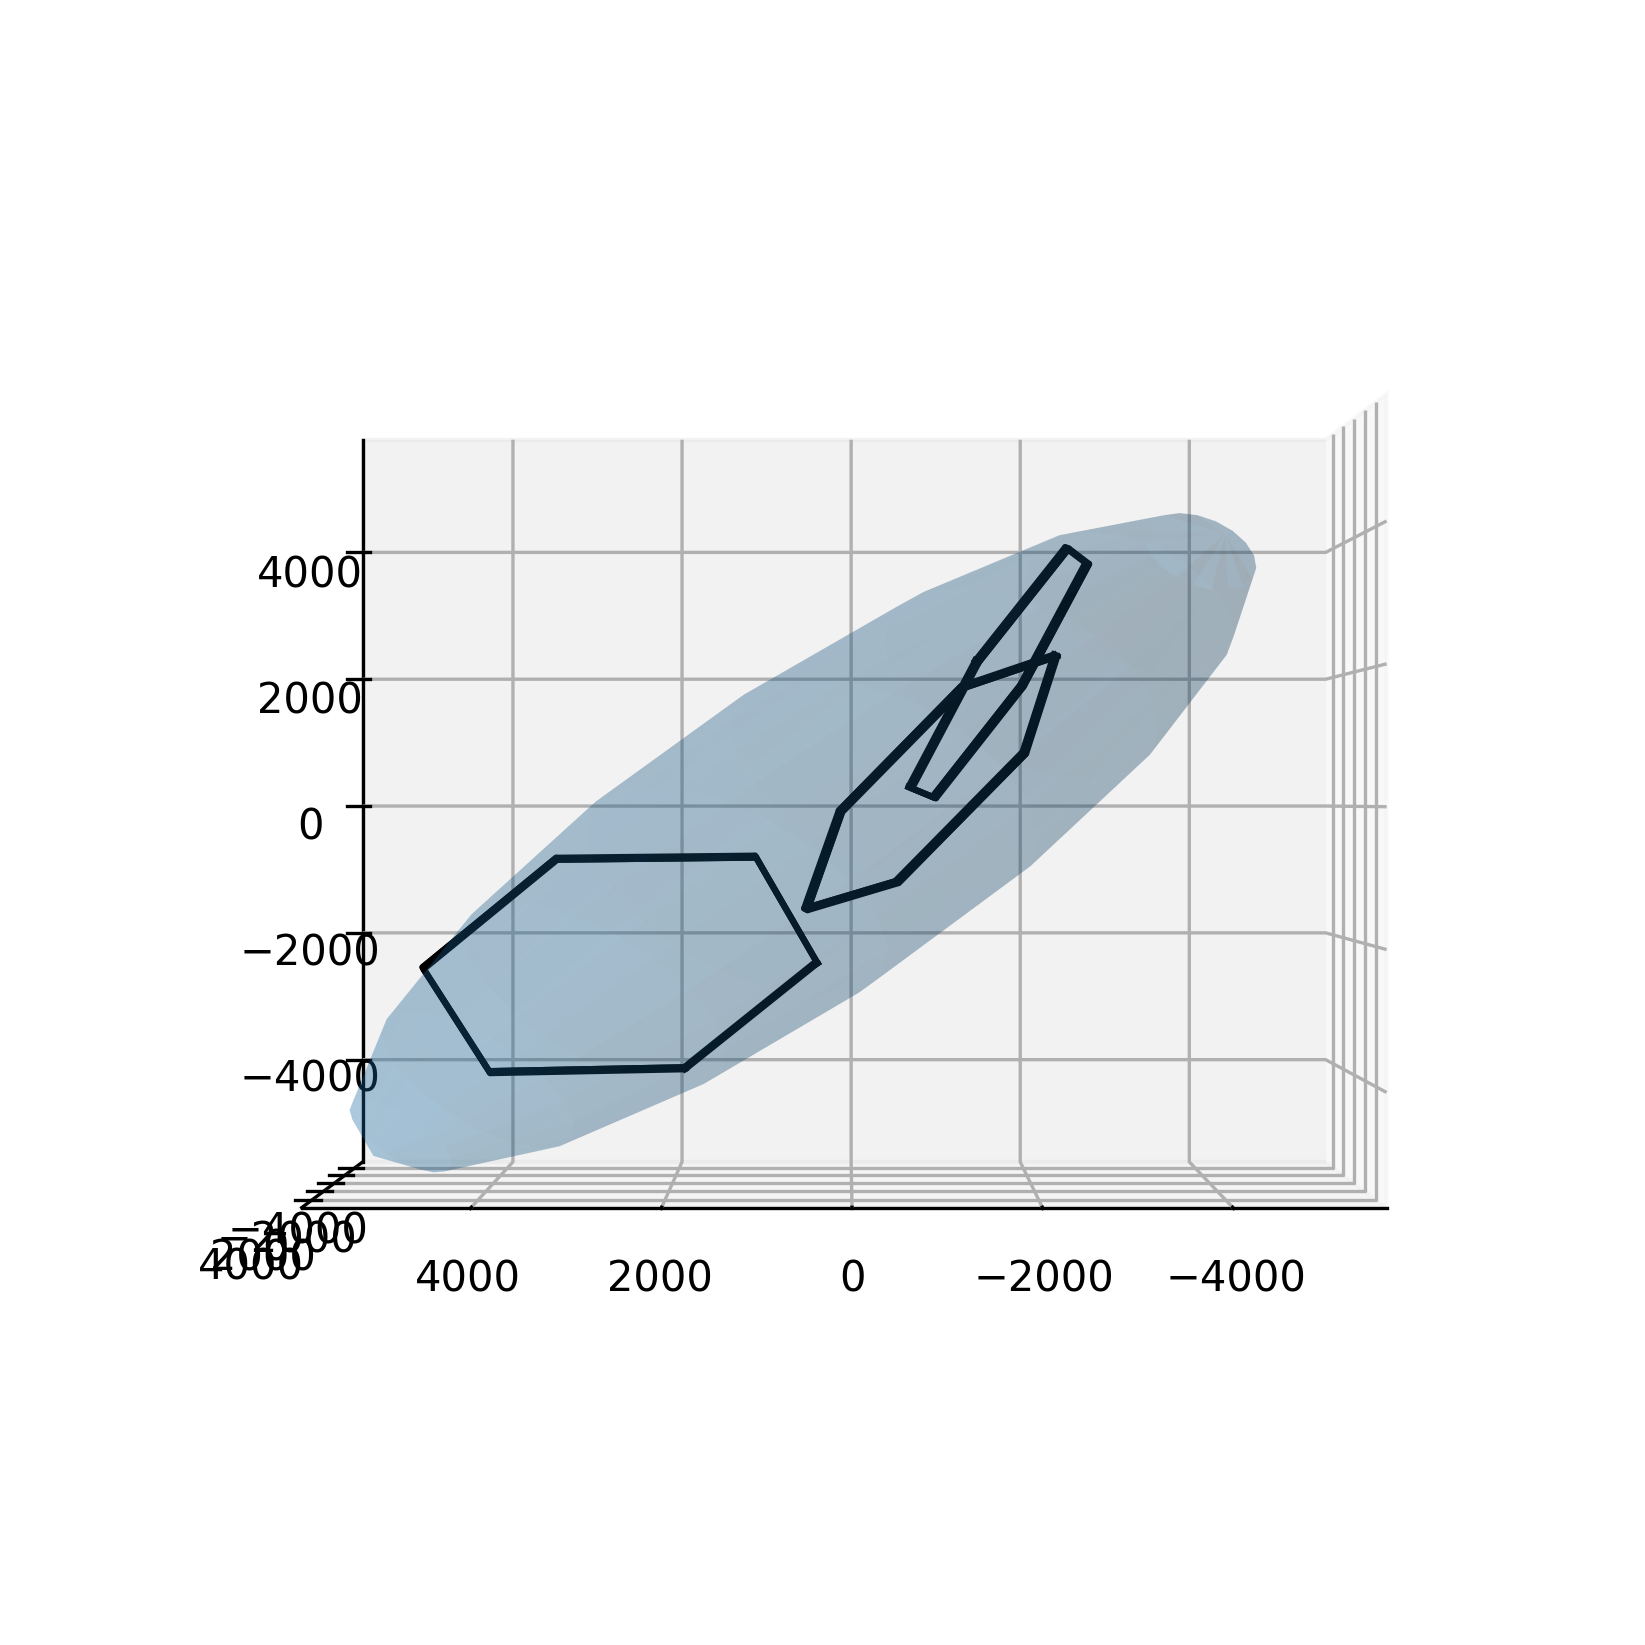

In [21]:
agg.plot_ellipsoid_aggs([agg], view='x', circle=None, agg_agg=True)